# HW_3

## Instalación de librerías


In [49]:
! pip install sktime


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [50]:
! pip install darts


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [51]:
! pip install --target=$nb_path -U statsforecast datasetsforecast


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [52]:
! pip install --target=$nb_path hierarchicalforecast


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [53]:
! pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip


## Importamos las librerias

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str
from sktime.utils.plotting import plot_correlations
from scipy import stats
import seaborn as sns
from darts.models import ExponentialSmoothing
from darts import TimeSeries
import seaborn as sbn
from darts.metrics import mape
from darts.models import Theta, FourTheta
from darts.models import AutoARIMA
from darts.utils.utils import SeasonalityMode, TrendMode, ModelMode
from darts.models import TBATS
from darts.metrics import mape

sns.set(rc={'figure.figsize':(8, 3)})
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [55]:
#obtain hierarchical dataset
from datasetsforecast.hierarchical import HierarchicalData

# compute base forecast no coherent
from statsforecast.core import StatsForecast
from statsforecast.models import AutoARIMA, Naive

#obtain hierarchical reconciliation methods and evaluation
from hierarchicalforecast.core import HierarchicalReconciliation
from hierarchicalforecast.evaluation import HierarchicalEvaluation
from hierarchicalforecast.methods import BottomUp, TopDown, MiddleOut

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from matplotlib import pyplot as plt

## Base de datos

In [56]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
df = pd.read_csv('StackOverflow.csv')
df.head()

,month,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,...,Plato,Sympy,Flair,stanford-nlp.1,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine
0,09-Jan,0,0,0,631,8,6,2,19,8,...,0,1,0,0,5,0,0,5,0,0
1,09-Feb,1,0,0,633,9,7,3,27,4,...,0,0,0,0,5,0,0,11,0,0
2,09-Mar,0,0,0,766,4,4,2,24,3,...,0,0,0,0,7,0,0,2,0,0
3,09-Apr,0,0,0,768,12,6,3,32,10,...,0,0,0,0,11,0,0,5,0,0
4,09-May,1,0,0,1003,2,7,2,42,7,...,0,0,0,0,10,0,0,3,0,0


## Ejecucion del problema

In [ ]:
df['month'] = pd.to_datetime(df['month'],format='%y-%b')
df.head

<bound method NDFrame.head of          month  nltk  spacy  stanford-nlp  python     r  numpy  scipy  matlab  \
0   2009-01-01     0      0             0     631     8      6      2      19   
1   2009-02-01     1      0             0     633     9      7      3      27   
2   2009-03-01     0      0             0     766     4      4      2      24   
3   2009-04-01     0      0             0     768    12      6      3      32   
4   2009-05-01     1      0             0    1003     2      7      2      42   
..         ...   ...    ...           ...     ...   ...    ...    ...     ...   
127 2019-08-01    57     76            24   20257  4486   1111    212     371   
128 2019-09-01    54     62            16   19207  4474   1020    135     362   
129 2019-10-01    73     79            27   23414  5138   1310    188     523   
130 2019-11-01    72     79            14   23602  4883   1297    199     479   
131 2019-12-01    82     72            13   20058  4150   1118    159     349  

In [ ]:
df1 = df[["month","matlab"]]
df1.head

<bound method NDFrame.head of          month  matlab
0   2009-01-01      19
1   2009-02-01      27
2   2009-03-01      24
3   2009-04-01      32
4   2009-05-01      42
..         ...     ...
127 2019-08-01     371
128 2019-09-01     362
129 2019-10-01     523
130 2019-11-01     479
131 2019-12-01     349

[132 rows x 2 columns]>

In [ ]:
daterng = pd.date_range(start='2009/01/01', end='2019/12/01', freq='m')
daterng

In [ ]:
# ponemos el mes como índice
ts = df.set_index('month')
ts.head()

,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,pandas,...,Plato,Sympy,Flair,stanford-nlp.1,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine
month,,,,,,,,,,,,,,,,,,,,,
2009-01-01,0,0,0,631,8,6,2,19,8,0,...,0,1,0,0,5,0,0,5,0,0
2009-02-01,1,0,0,633,9,7,3,27,4,0,...,0,0,0,0,5,0,0,11,0,0
2009-03-01,0,0,0,766,4,4,2,24,3,0,...,0,0,0,0,7,0,0,2,0,0
2009-04-01,0,0,0,768,12,6,3,32,10,0,...,0,0,0,0,11,0,0,5,0,0
2009-05-01,1,0,0,1003,2,7,2,42,7,0,...,0,0,0,0,10,0,0,3,0,0


In [ ]:
df1['month'] = pd.to_datetime(df1['month'],format = '%y-%b')
df1

,month,matlab
0,2009-01-01,19
1,2009-02-01,27
2,2009-03-01,24
3,2009-04-01,32
4,2009-05-01,42
...,...,...
127,2019-08-01,371
128,2019-09-01,362
129,2019-10-01,523
130,2019-11-01,479


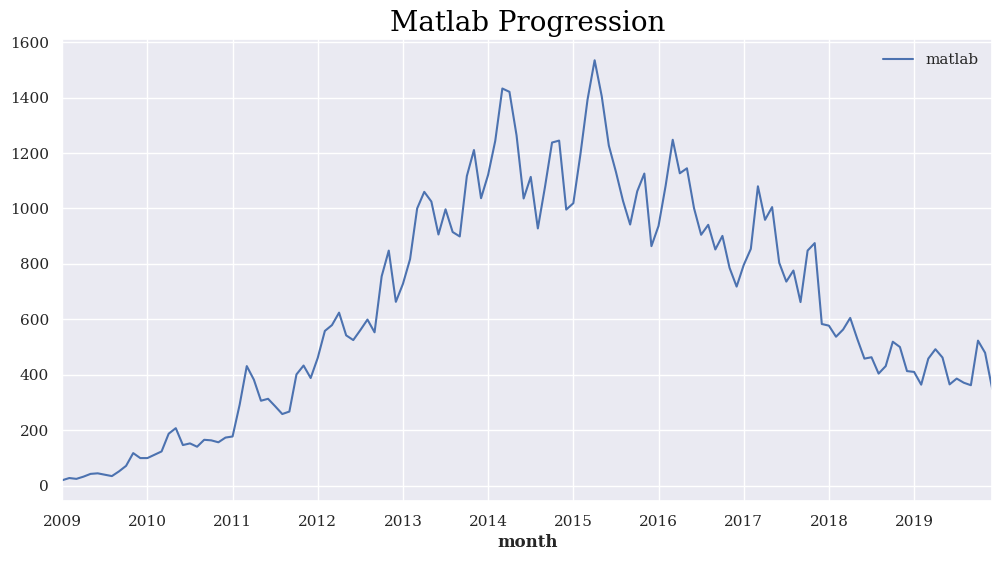

In [ ]:
matlab = ts.iloc[:, 7]
plt.rcParams["figure.figsize"] = (12,6)
matlab.plot()

plt.title(label="Matlab Progression",
          fontsize=20,
          color="black")

plt.legend()

Estudio la estacionalidad

In [ ]:
df2 = df1.set_index('month')
df2

,matlab
month,
2009-01-01,19
2009-02-01,27
2009-03-01,24
2009-04-01,32
2009-05-01,42
...,...
2019-08-01,371
2019-09-01,362
2019-10-01,523


Text(0.5, 0, '')

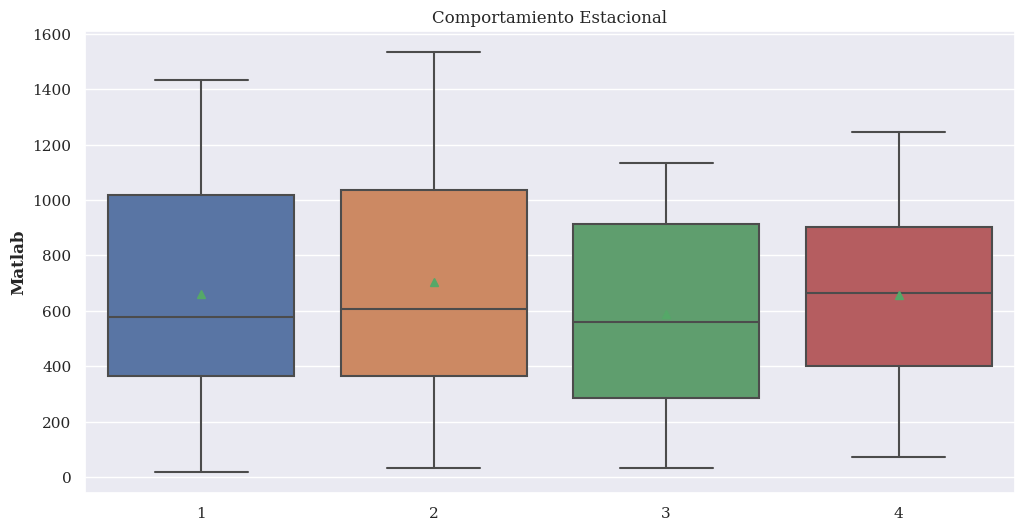

In [ ]:
df2['month'] = df2.index.quarter

sns.boxplot(data=df2, x='month', y='matlab',showmeans=True)
ax = plt.gca()
ax.set_ylabel('Matlab')
ax.set_title('Comportamiento Estacional')
ax.set_xlabel('')

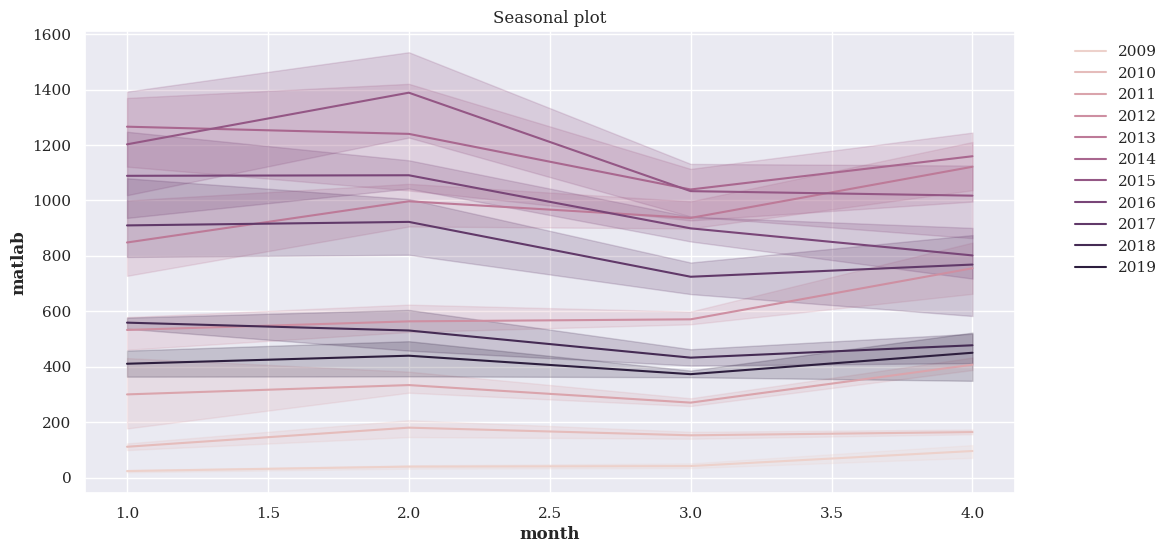

In [ ]:
df2['Y'] = df2.index.year
sns.lineplot(data=df2, 
             x='month', 
             y='matlab', 
             hue='Y', 
             legend='full')
plt.title('Seasonal plot')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

#Se debe separar la muestra en tres partes entrenamiento, validación(12 meses) y test (6 meses). Cuando no sea necesaria la validación la muestra de test debe ser de 6 meses.

In [ ]:
df_ts = TimeSeries.from_dataframe (df1,'month','matlab')
df_ts.head()

<TimeSeries (DataArray) (month: 5, component: 1, sample: 1)>
array([[[19.]],

       [[27.]],

       [[24.]],

       [[32.]],

       [[42.]]])
Coordinates:
  * month      (month) datetime64[ns] 2009-01-01 2009-02-01 ... 2009-05-01
  * component  (component) object 'matlab'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

Text(0.5, 1.0, 'Matlab Progression Train y Test')

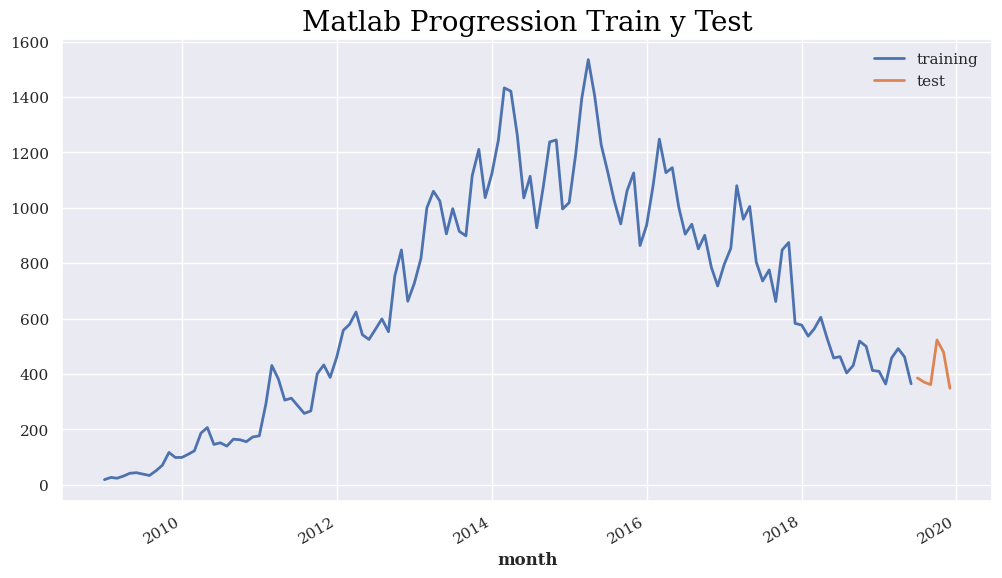

In [ ]:
train, test = df_ts.split_before(pd.Timestamp("20190701"))
train.plot(label="training")
test.plot(label="test")

plt.title(label="Matlab Progression Train y Test",
          fontsize=20,
          color="black")

In [ ]:
ets1 = ExponentialSmoothing()
ets1.fit(train)
prediccion_ets = ets1.predict(len(test))

Text(0.5, 1.0, 'ETS modelo')

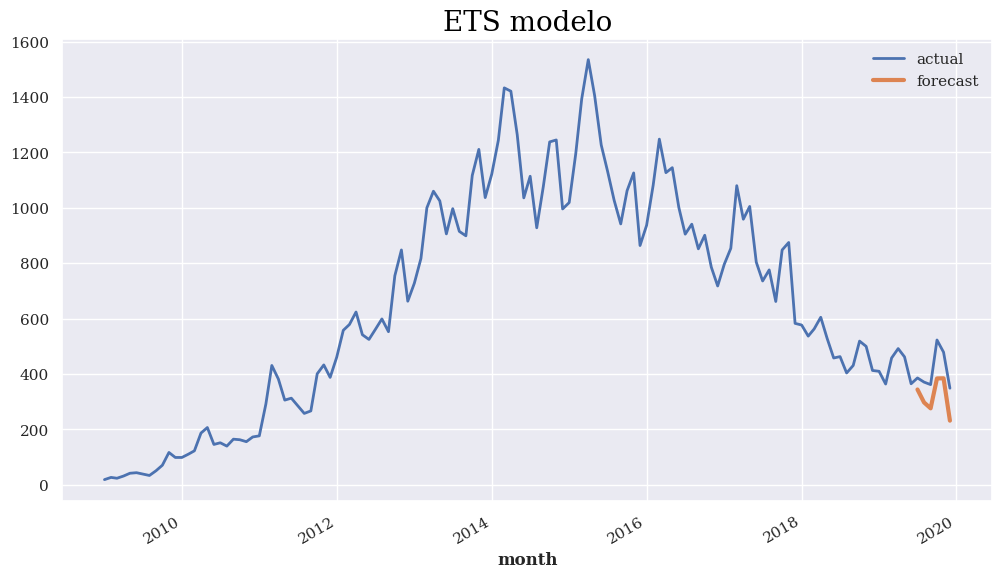

In [ ]:
df_ts.plot(label='actual')
prediccion_ets.plot(label='forecast', lw=3)
plt.legend()

plt.title(label="ETS modelo",
          fontsize=20,
          color="black")

In [ ]:
ets2 = mape(test,prediccion_ets)
ets2

In [ ]:
arima1 = AutoARIMA()
arima1.fit(train)
prediccion_arima = arima1.predict(len(test))

In [ ]:
df_ts.plot(label='actual')
prediccion_arima.plot(label='forecast arima', lw=3)
plt.legend()

plt.title(label="ARIMA model",
          fontsize=20,
          color="black")

In [ ]:
df_ts.plot(label='actual')
prediccion_arima.plot(label='forecast arima', lw=3)
plt.legend()

plt.title(label="ARIMA model",
          fontsize=20,
          color="black")

In [ ]:
arima2 = mape(test,prediccion_arima)
arima2

In [ ]:
fourtheta1 =FourTheta(seasonality_period=12)
fourtheta1.fit(train)
prediccion_4theta = fourtheta1.predict(len(test))
print("model {} obtains MAPE: {:.2f}%".format(fourtheta1, mape(test, prediccion_4theta)))

model FourTheta(seasonality_period=12) obtains MAPE: 41.10%


Text(0.5, 1.0, '4Theta model')

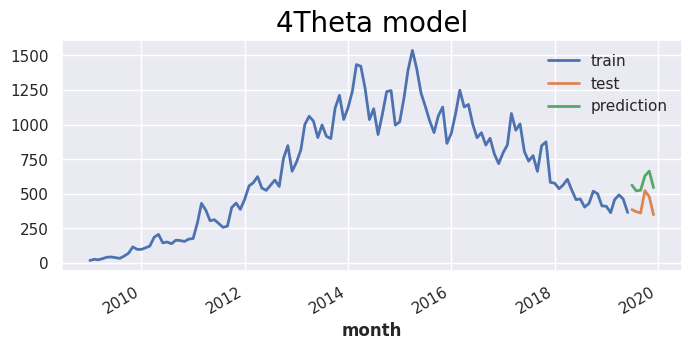

In [ ]:
train.plot(label="train")
test.plot(label="test")
prediccion_4theta.plot(label="prediction")

plt.title(label="4Theta model",
          fontsize=20,
          color="black")

In [ ]:
fourtheta_grid = {
    #'theta':2- np.linspace(-10, 10, 10),
    'theta':[-4,-3,-2,-1,1,2,3,4],
    'model_mode': [ModelMode.ADDITIVE,ModelMode.MULTIPLICATIVE],
    'season_mode': [SeasonalityMode.MULTIPLICATIVE,SeasonalityMode.ADDITIVE],
    'trend_mode': [TrendMode.EXPONENTIAL,TrendMode.LINEAR]
}

best_grid_model=FourTheta.gridsearch(parameters=fourtheta_grid,
                                series=train,
                                forecast_horizon=36, # 12
                                start=0.5,
                                last_points_only=False,
                                metric=mape,
                                reduction=np.mean,
                                verbose=False,
                                n_jobs=-1)

best_grid_model

The `LightGBM` module could not be imported. To enable LightGBM support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `Prophet` module could not be imported. To enable Prophet support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `CatBoost` module could not be imported. To enable CatBoost support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `LightGBM` module could not be imported. To enable LightGBM support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `Prophet` module could not be imported. To enable Prophet support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `CatBoost`

(FourTheta(theta=1, seasonality_period=None, season_mode=SeasonalityMode.MULTIPLICATIVE, model_mode=ModelMode.ADDITIVE, trend_mode=TrendMode.EXPONENTIAL, normalization=True),
 {'theta': 1,
  'model_mode': <ModelMode.ADDITIVE: 'additive'>,
  'season_mode': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>,
  'trend_mode': <TrendMode.EXPONENTIAL: 'exponential'>},
 44.399022105125766)

Text(0.5, 1.0, 'Best 4Theta model')

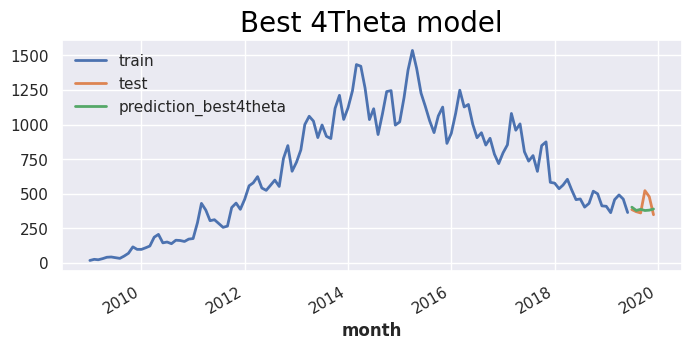

In [ ]:
model_bestfourtheta=FourTheta(theta=best_grid_model[1]['theta'],
                 model_mode=ModelMode.ADDITIVE,
                 season_mode=SeasonalityMode.MULTIPLICATIVE,
                 trend_mode=TrendMode.LINEAR
                 )
model_bestfourtheta.fit(train)
prediction_best4theta = model_bestfourtheta.predict(len(test))

train.plot(label="train")
test.plot(label="test")
prediction_best4theta.plot(label="prediction_best4theta")

plt.title(label="Best 4Theta model",
          fontsize=20,
          color="black")

In [ ]:
thetas = 2- np.linspace(-10, 10, 50)

best_mape = float("inf")
best_theta = 0


for theta in thetas:

    model_4theta = Theta(theta)
    model_4theta.fit(train)
    prediction_4theta = model_4theta.predict(len(test))
    res = mape(test, prediction_4theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

In [ ]:
best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(test))

<Axes: xlabel='month'>

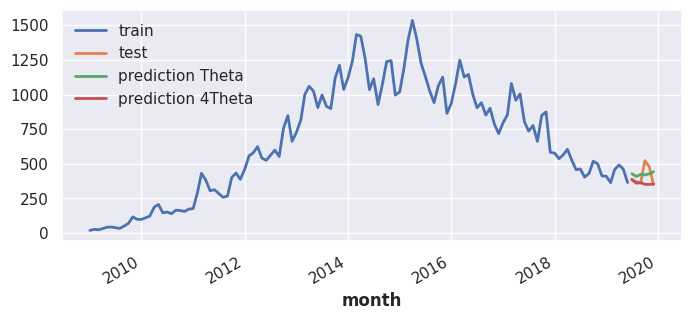

In [ ]:
train.plot(label="train")
test.plot(label="test")
prediction_4theta.plot(label="prediction Theta")
pred_best_theta.plot(label="prediction 4Theta")

In [ ]:
theta = mape(test,prediction_4theta)
theta

15.93284089399814

In [ ]:
best4theta = mape (test, prediction_best4theta)
best4theta

12.279260550010159

In [ ]:
model_tbats =TBATS(
use_box_cox=None,
box_cox_bounds=(0, 1),
use_trend=None,
use_damped_trend=None,
seasonal_periods="freq",
use_arma_errors=True,
show_warnings=False,
multiprocessing_start_method='spawn',
random_state=0)
model_tbats.fit(train)
prediction_tbats = model_tbats.predict(len(test))

In [ ]:
model_tbats.model.params.summary()

'Use Box-Cox: True\nUse trend: True\nUse damped trend: False\nSeasonal periods: [12.]\nSeasonal harmonics [4]\nARMA errors (p, q): (0, 0)\nBox-Cox Lambda 0.575624\nSmoothing (Alpha): 0.731800\nTrend (Beta): 0.041770\nDamping Parameter (Phi): 1.000000\nSeasonal Parameters (Gamma): [ 1.31516020e-07 -3.15248939e-07]\nAR coefficients []\nMA coefficients []\nSeed vector [ 3.62023513  1.87152987  1.10672604 -4.22303091 -1.89909995  0.80224378\n  4.20342617 -0.51672321  0.67266762  1.30258307]\n'

<Axes: xlabel='month'>

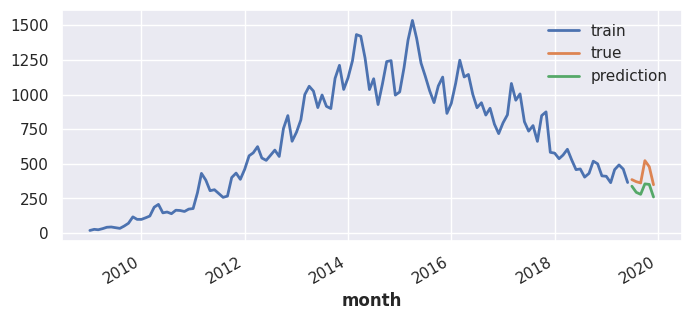

In [ ]:
train.plot(label="train")
test.plot(label="true")
prediction_tbats.plot(label="prediction")

In [ ]:
tbats = mape(test, prediction_tbats)
tbats

23.30709181640146

In [ ]:
mape = pd.DataFrame()

In [ ]:
modelos = ['ETS','4Theta','TBATS']
mapes = [ets1,theta,tbats]
mape['Nombre'] = modelos
mape['MAPE'] = mapes

In [ ]:
mape

,Nombre,MAPE
0,ETS,ExponentialSmoothing()
1,4Theta,15.932841
2,TBATS,23.307092


In [ ]:
mape.sort_values('MAPE')

TypeError: '<' not supported between instances of 'float' and 'ExponentialSmoothing'

In [48]:
arima1 = AutoARIMA()
arima1.fit(df_ts)

prediction = arima1.predict(12)
df_ts.plot(label='actual')
prediction.plot(label='forecast',lw=3)
plt.legend()

AttributeError: 'TimeSeries' object has no attribute 'ndim'